<a href="https://colab.research.google.com/github/Shathrugna123/ML/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.9777777777777777


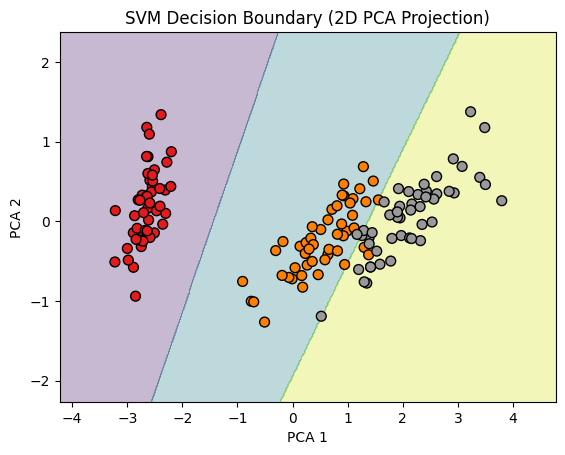

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Load the iris dataset
X, y = datasets.load_iris(return_X_y=True)

# Reduce to 2D using PCA (for visualization only)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train the SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Print accuracy
print("Accuracy:", model.score(X_test, y_test))

# Plot decision boundaries
def plot_decision_boundary(model, X, y):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.Set1, edgecolors='k')
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.title("SVM Decision Boundary (2D PCA Projection)")
    plt.show()

# Plot it
import numpy as np
plot_decision_boundary(model, X_pca, y)
